In [47]:
def bestc(xtr,ytr,yv,xv,vmin,vmax,k,m):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):

        tx_acerto_max = 0
        c = 2**p
#         print(np.dot(xtr.T,xtr)+c*np.eye(m))
        w = np.dot(np.linalg.inv(np.dot(xtr.T,xtr)+c*np.eye(m)),np.dot(xtr.T,ytr))

        Y_est = np.dot(xv,w)

        err_graph.append(np.linalg.norm(Y_est-yv))
        acerto = 0
#         Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [48]:
def bestc_refined(xtr,ytr,yv,xv,vmin,vmax,k,m):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):

        tx_acerto_max = 0
        c = p
#         print(np.dot(xtr.T,xtr)+c*np.eye(m))
        w = np.dot(np.linalg.inv(np.dot(xtr.T,xtr)+c*np.eye(m)),np.dot(xtr.T,ytr))

        Y_est = np.dot(xv,w)

        err_graph.append(np.linalg.norm(Y_est-yv))
        acerto = 0
        #Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [49]:
import numpy as np
import sklearn
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('data.mat')
test = scipy.io.loadmat('test.mat')

X = data['X']

X0 = np.ones((1,X.shape[0]))
print(X0.T.shape)
print(X.shape)
X0 = X0.T
X = np.hstack((X0,X))

print(X.shape)

Y = data['S']

Xt = test['Xt']

# print(Xt0.T.shape)
# print(Xt.shape)


Xt0 = np.ones((1,Xt.shape[0]))
Xt0 = Xt0.T
Xt = np.hstack((Xt0,Xt))


Yt = test['St']

# N, m = X.shape
# Nt, mt = Xt.shape

Xtr, Xv, Ytr, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

Nv,mv = Xv.shape
print(Xt.shape)

# print(X.shape)


(60000, 1)
(60000, 784)
(60000, 785)
(10000, 785)


In [60]:
np.random.seed(42)

W = np.random.normal(scale=0.2 ,size = (500, X.shape[1]))

In [61]:
htr = np.dot(Xtr,W.T)
print(htr.shape)

htr0 = np.ones((1,htr.shape[0]))
print(htr0.T.shape)
htr0 = htr0.T
htr = np.hstack((htr0,htr))

# print(htr.shape)

hv = np.dot(Xv,W.T)
# print(hv.shape)


hv0 = np.ones((1,hv.shape[0]))

hv0 = hv0.T
hv = np.hstack((hv0,hv))

(48000, 500)
(48000, 1)


In [62]:
Htr = np.copy(htr)

for i in range(htr.shape[0]):
    for j in range(htr.shape[1]):
        if htr[i,j]>=0:
            Htr[i,j] = htr[i,j]
        else:
            Htr[i,j] = 0.1*htr[i,j]
            
Hv = np.copy(hv)

for i in range(hv.shape[0]):
    for j in range(hv.shape[1]):
        if hv[i,j]>=0:
            Hv[i,j] = hv[i,j]
        else:
            Hv[i,j] = 0.1*hv[i,j]            
            
            
# print(h[:10,:10])
# print(H[:10,:10])

In [63]:
c, t, err = bestc(Htr,Ytr,Yv,Hv,-1,15,1,500)
plt.grid(True, which="both")
plt.semilogx(c,t)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
print(max(t))
t_max = max(t)
idx_max = t.index(t_max)
print('Max value of c:',c[idx_max] )
plt.grid(True, which="both")
plt.semilogx(c,err)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio na Variação')
plt.show()
print(min(t))
err_min = min(err)
idx_min = err.index(err_min)
print('Min value of err:', c[idx_min])



KeyboardInterrupt: 

In [ ]:
c_r, t_r, err_r = bestc_refined(Htr,Ytr,Yv,Hv,-25,-10,1,501)
plt.grid(True, which="both")
plt.plot(c_r,t_r)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
t_max = max(t_r)
idx_max = t_r.index(t_max)
print(max(t))
print('Max value of c:',c_r[idx_max] )

c_r, t_r, err_r = bestc_refined(Htr,Ytr,Yv,Hv,30,40,1,501)
plt.grid(True, which="both")
plt.plot(c_r,err_r)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio na Variação')
plt.show()
err_min = min(err_r)
idx_min = err_r.index(err_min)
print(min(t))
print('Min value of err:', c_r[idx_min], '\n')

In [41]:
c = 155
h = np.dot(X,W.T)

h0 = np.ones((1,h.shape[0]))

h0 = h0.T
h = np.hstack((h0,h))


H = np.copy(h)

for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        if h[i,j]>=0:
            H[i,j] = h[i,j]
        else:
            H[i,j] = 0.1*h[i,j]            


w = np.dot(np.linalg.inv(np.dot(H.T,H)+c*np.eye(501)),np.dot(H.T,Y))
Y_est_t = np.dot(H,w) 
Yt_est = np.zeros(Y_est_t.shape)

for row in range(Y_est_t.shape[0]):
    #maximum value of each Y row
    max_value = max(Y_est_t[row,:])
    #Position of the max value in the Row
    indmax = np.where(Y_est_t[row,:]==max_value)
    Yt_est[row,indmax[0][0]] =  1
    
Yt_est = Yt_est.astype(int)
pred = []
true = []


for i in range(Y.shape[0]):

    pred.append(np.where(Yt_est[i]==1)[0][0]+1)
    true.append(np.where(Y[i]==1)[0][0]+1)


[[6626   36    7   12   13   14   13   13    7    1]
 [  70 5312   88   96   13   95   77  133   15   59]
 [  36  142 5503   16  122   26   73  124   67   22]
 [  53   23    1 5381   14   55   15   28  260   12]
 [  50   17  180   60 4758  119   19   89   65   64]
 [  27   19    4   33   76 5673    8   27    3   48]
 [ 113   71   23   98    8    8 5732   15  166   31]
 [ 149   56  139   67  162   60   27 5010  145   36]
 [  34   14   78  238   40    8  233   61 5200   43]
 [   0   16   16   12   30   63    6   55    6 5719]]


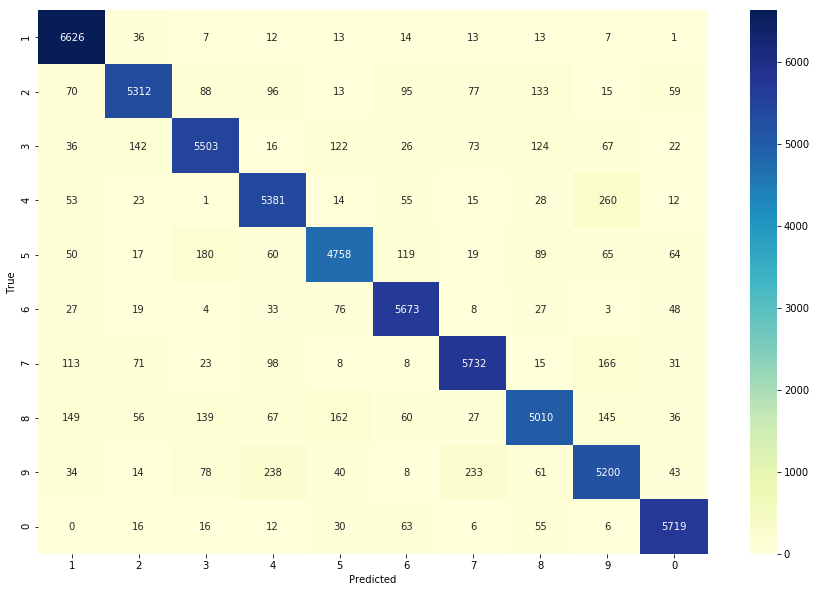

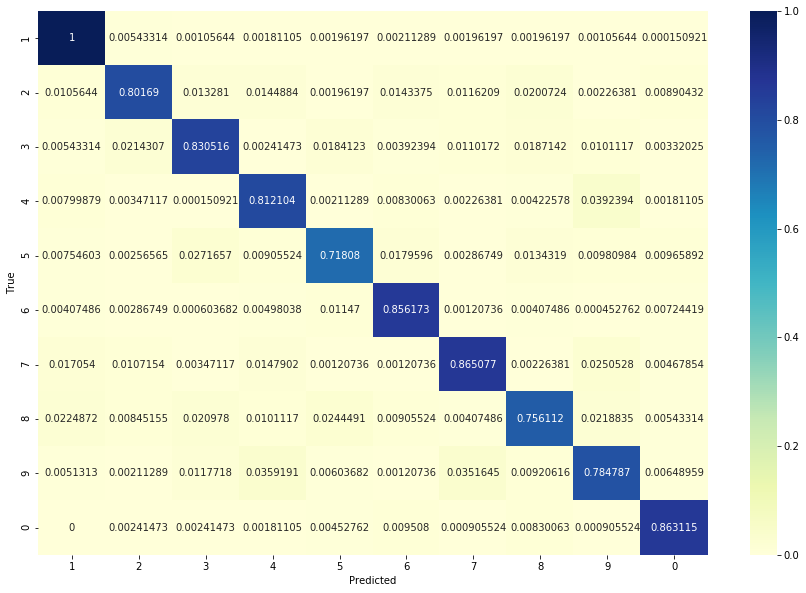

In [42]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
conf = confusion_matrix(true, pred )

print(conf)

df_cm = pd.DataFrame(conf, index = [i for i in "1234567890"],
                  columns = [i for i in "1234567890"])
plt.figure(figsize = (15,10))

sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

# plt.figure(figsize = (10,7))
# ax= plt.subplot()
# sn.heatmap(conf, annot=True, ax = ax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


confmax, confmin = conf.max(), conf.min()
conf2 = (conf - confmin)/(confmax - confmin)

df_cm = pd.DataFrame(conf2, index = [i for i in "1234567890"],
                  columns = [i for i in "1234567890"])
plt.figure(figsize = (15,10))

sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

# plt.figure(figsize = (10,7))
# ax= plt.subplot()
# sn.heatmap(conf, annot=True, ax = ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [43]:
c = 155
ht = np.dot(Xt,W.T)

ht0 = np.ones((1,ht.shape[0]))

ht0 = ht0.T
ht = np.hstack((ht0,ht))

Ht = np.copy(ht)

for i in range(ht.shape[0]):
    for j in range(ht.shape[1]):
        if ht[i,j]>=0:
            Ht[i,j] = ht[i,j]
        else:
            Ht[i,j] = 0.1*ht[i,j]            


w = np.dot(np.linalg.inv(np.dot(H.T,H)+c*np.eye(501)),np.dot(H.T,Y))
Y_est_t = np.dot(H,w) 
Yt_est = np.zeros(Y_est_t.shape)

for row in range(Y_est_t.shape[0]):
    #maximum value of each Y row
    max_value = max(Y_est_t[row,:])
    #Position of the max value in the Row
    indmax = np.where(Y_est_t[row,:]==max_value)
    Yt_est[row,indmax[0][0]] =  1
    
Yt_est = Yt_est.astype(int)
pred = []
true = []


for i in range(Y.shape[0]):

    pred.append(np.where(Yt_est[i]==1)[0][0]+1)
    true.append(np.where(Y[i]==1)[0][0]+1)

Wrong line: 24
True value: 1
Prediction: 5 



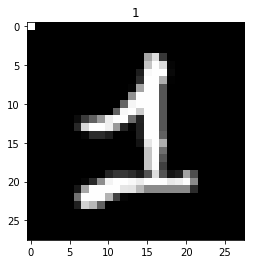

Wrong line: 28
True value: 2
Prediction: 7 



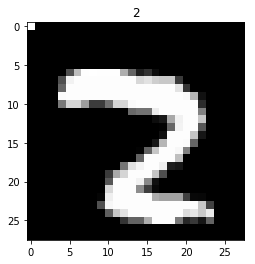

Wrong line: 33
True value: 9
Prediction: 7 



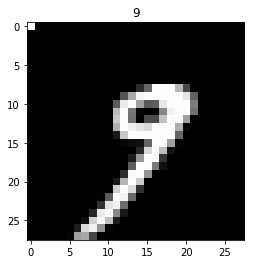

Wrong line: 132
True value: 5
Prediction: 3 



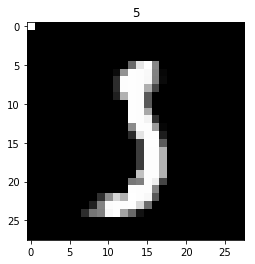

Wrong line: 148
True value: 7
Prediction: 4 



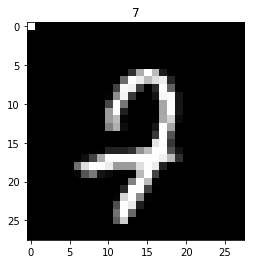

In [44]:
count=0
jf =[]
wrong =[]
for i in range(len(pred)):
    if true[i]!=pred[i]:
        if true[i] in jf:
            pass
        else:
            wrong.append(i)
            print('Wrong line:', i)
            print('True value:',true[i])
            if pred[i]==10:
                print('Prediction: 0')
            else:
                print('Prediction:',pred[i],'\n')
            jf.append(true[i])
            count+=1
            # showing the number
            ct =0
            img = np.eye(28)
            for j in range(28):
                img[j] = X[i,ct:ct+28]
                ct+=28
            img = np.flip(img,1)
            plt.title(true[i])    
            plt.imshow(np.rot90(img),cmap ='gray')
            plt.show()
            ct=0
            if count ==5:
                break
        

In [4]:
import numpy as np
import sklearn
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('data.mat')
test = scipy.io.loadmat('test.mat')

X = data['X']

X0 = np.ones((1,X.shape[0]))
X0 = X0.T
X = np.hstack((X0,X))


Y = data['S']

Xt = test['Xt']


Xt0 = np.ones((1,Xt.shape[0]))
Xt0 = Xt0.T
Xt = np.hstack((Xt0,Xt))


Yt = test['St']

N, m = X.shape

Xtr, Xv, Ytr, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

Nv,mv = Xv.shape


np.random.seed(42)

W = np.random.normal(scale=0.2 ,size = (1100, X.shape[1]))


htr = np.dot(Xtr,W.T)

htr0 = np.ones((1,htr.shape[0]))
htr0 = htr0.T
htr = np.hstack((htr0,htr))

# print(htr.shape)

hv = np.dot(Xv,W.T)
# print(hv.shape)

hx = np.dot(X,W.T)

hx0 = np.ones((1,hx.shape[0]))
hx0 = hx0.T
hx = np.hstack((hx0,hx))


# print(htr.shape)

hv = np.dot(Xv,W.T)


hv0 = np.ones((1,hv.shape[0]))

hv0 = hv0.T
hv = np.hstack((hv0,hv))

Hx = np.copy(hx)

for i in range(hx.shape[0]):
    for j in range(hx.shape[1]):
        if hx[i,j]>=0:
            Hx[i,j] = hx[i,j]
        else:
            Hx[i,j] = 0.1*hx[i,j]

Htr = np.copy(htr)

for i in range(htr.shape[0]):
    for j in range(htr.shape[1]):
        if htr[i,j]>=0:
            Htr[i,j] = htr[i,j]
        else:
            Htr[i,j] = 0.1*htr[i,j]
            
Hv = np.copy(hv)

for i in range(hv.shape[0]):
    for j in range(hv.shape[1]):
        if hv[i,j]>=0:
            Hv[i,j] = hv[i,j]
        else:
            Hv[i,j] = 0.1*hv[i,j]            


print('Começou')
            
tx_graph = []
c_graph = []
err_graph = []

tx_acerto_max = 0
c = 155
w = np.dot(np.linalg.inv(np.dot(Htr.T,Htr)+c*np.eye(1101)),np.dot(Htr.T,Ytr))

Y_est = np.dot(Hx,w)

err_graph.append(np.linalg.norm(Y_est-Y))
acerto = 0
#         Test
for i in range(0,int(N)):
    #maximum value of each Y row
    max_value = max(Y_est[i,:])

    #Position of the max value in the Row
    indmax = np.where(Y_est[i,:]==max_value)



    if Y[i,indmax[0][0]]>0.5:
        acerto+=1

tx_acerto = acerto/(N)

if tx_acerto >= tx_acerto_max:
    tx_acerto_max  = tx_acerto
    c_min  = c
    w_min = w
    tx_graph.append(tx_acerto_max) 
    c_graph.append(c_min)            

print(tx_acerto)


Começou
0.9462166666666667
